In [1]:
from math import log
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Problem 1

The solve_ivp solver requires a callable function representing the right hand side of the IVP. Define the function predator_prey() that accepts the current r(t) and w(t) values as a 1d array y, and the current time t, and returns the right hand side of the predator-prey model as a tuple. Use $\alpha$ = 1.0, $\beta$ = 0.5, $\delta$ = 0.75, and $\gamma$ = 0.25 as your growth parameters.

In [2]:
def predator_prey(t, y):
    """Compute right hand side of Predator-Prey model based on rabbit and
    wolf populations at given time.
    
    Parameters:
        y ((2, ) ndarray): A vector representing rabbit and wolf populations 
            at time t.
        t (float): Current time.
        
    Returns:
        An ndarray corresponding to right hand side of the Predator-
            Prey model.
    """
    #Predator prey parameters
    a = 1.0
    B = 0.5
    d = 0.75
    g = 0.25
    
    #Return the resulting function
    return np.array([y[0]*(a-B*y[1]) , y[1]*(-1*d+g*y[0])])

# Problem 2

Use solve_ivp to solve the predator-prey model ODE with initial conditions (r0 , w0 ) = (5, 3) and time ranging from 0 to 20 years. Display the resulting rabbit and wolf populations over time (stored as columns in the output of solve_ivp) on the same plot.

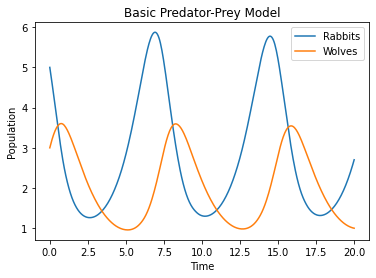

In [3]:
y0 = np.array([5,3])
t0=0
tf=20
t=np.linspace(0,20,400)
sol = solve_ivp(predator_prey, (t0,tf), y0, t_eval=t)

plt.plot(sol.t, sol.y[0], label="Rabbits")
plt.plot(sol.t, sol.y[1], label="Wolves")
plt.legend()
plt.title("Basic Predator-Prey Model")
plt.xlabel("Time")
plt.ylabel("Population")
plt.show()

# Problem 3

Similar to problem 1, define the function Lotka_Volterra() that takes in the current preditor and prey populations as a 1d array y and the current time as a float t and returns the right hand side of the Lotka-Volterra predator-prey model with $\eta$ = 1/3.

Using solve_ivp, solve the IVP with three different initial conditions $y_0 = (1/2, 1/3)$, $y_0 = (1/2, 3/4)$, and $y_0 = (1/16, 3/4)$ and time domain $t = [0, 13]$. Plot these three solutions on the same graph as the phase portrait and the equilibria (0, 0) and (1, 1).

Since your solutions are being plotted with the phase portrait, plot the two populations against eachother (instead of both individually against time).

In [4]:
def Lotka_Volterra(t, y):
    """Compute right hand side of Lotka Volterra Predator-Prey model based 
    on rabbit and wolf populations at given time.
    
    Parameters:
        y ((2, ) ndarray): A vector representing rabbit and wolf populations 
            at time t.
        t (float): Current time.
        
    Returns:
        (tuple): A tuple corresponding to right hand side of the Lotka 
            Volterra Predator-Prey model.
    """
    #Predator prey parameters
    U = y[0]
    V = y[1]
    n = 1/3
    
    #Return the resulting function
    return np.array([U*(1-V) , n*V*(U-1)])

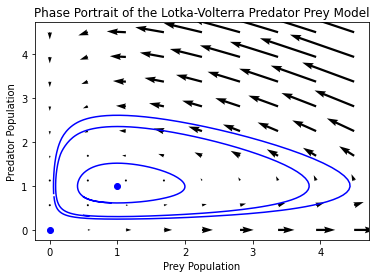

In [5]:
t0=0
tf=13
t = np.linspace(0,13,200)
for y0 in [np.array([1/2,1/3]),np.array([1/2,3/4]),np.array([1/16,3/4])]:
    sol = solve_ivp(Lotka_Volterra, (t0,tf), y0, t_eval=t)
    
    plt.plot(sol.y[0], sol.y[1], color="blue")
# Provided code for plotting phase portrait.
Y1, Y2 = np.meshgrid(np.linspace(0,4.5,25), np.linspace(0,4.5,25))
dU, dV = Lotka_Volterra(0, (Y1, Y2))
Q = plt.quiver(Y1[::3, ::3],Y2[::3, ::3],dU[::3, ::3],dV[::3, ::3])
plt.scatter([0,1],[0,1], color="blue")
plt.title("Phase Portrait of the Lotka-Volterra Predator Prey Model")
plt.xlabel("Prey Population")
plt.ylabel("Predator Population")
plt.show()

# Problem 4

Define a new function Logistic_Model() that takes in the current preditor and prey populations y and the current time t and returns the right hand side of the logistic predator-prey model as a tuple.

Use solve_ivp to compute solutions (U, V) of (1.3) for initial conditions (1/3, 1/3) and (1/2, 1/5). Do this for parameter values $\eta$, $\rho$ = 1, 0.3 and also for values $\eta$, $\rho$ = 1, 1.1.

Create a phase portrait for the logistic equations using both sets of parameter values. Plot the direction field, all equilibrium points, and both solution orbits on the same plot for each set of parameter values.

In [6]:
def Logistic_Model1(t, y):
    """Compute right hand side of Logistic Predator-Prey model based on
    rabbit and wolf populations at given time.
    
    Parameters:
        y ((2, ) ndarray): A vector representing rabbit and wolf populations 
            at time t.
        t (float): Current time.
        
    Returns:
        (tuple): A tuple corresponding to right hand side of the Logistic 
            Predator-Prey model.
    """
    n, p = 1,.3 #parameters
    
    return np.array([y[0]*(1-y[0]-y[1]),n*y[1]*(y[0]-p)])

def Logistic_Model2(t, y):
    n, p = 1,1.1 #parameters
    
    return np.array([y[0]*(1-y[0]-y[1]),n*y[1]*(y[0]-p)])

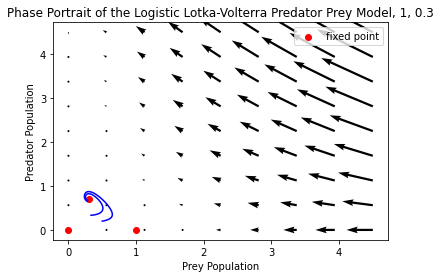

In [7]:
t0=0
tf=13
t = np.linspace(0,13,400)
for y0 in [np.array([1/3,1/3]),np.array([1/2,1/5])]: #Plot solutions
    sol = solve_ivp(Logistic_Model1, (t0,tf), y0, t_eval=t)
    
    plt.plot(sol.y[0], sol.y[1], color="blue")

#Create the Phase portrait    
Y1, Y2 = np.meshgrid(np.linspace(0,4.5,25), np.linspace(0,4.5,25))
dU, dV = Logistic_Model1(0, (Y1, Y2))
Q = plt.quiver(Y1[::3, ::3],Y2[::3, ::3],dU[::3, ::3],dV[::3, ::3])

#Plot fixed Points
plt.scatter([0,1,3/10],[0,0,7/10], color="red", label = "fixed point")
plt.title("Phase Portrait of the Logistic Lotka-Volterra Predator Prey Model, 1, 0.3")
plt.xlabel("Prey Population")
plt.ylabel("Predator Population")
plt.legend()
plt.show()

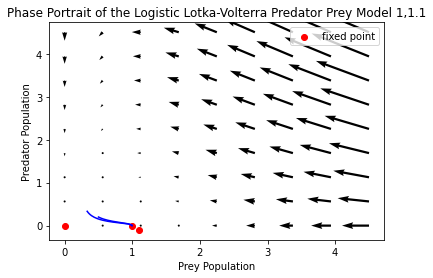

In [8]:
t0=0
tf=50
t = np.linspace(0,50,400)
for y0 in [np.array([1/3,1/3]),np.array([1/2,1/5])]: #Plot solutions
    sol = solve_ivp(Logistic_Model2, (t0,tf), y0, t_eval=t)
    
    plt.plot(sol.y[0], sol.y[1], color="blue")


#Create the Phase portrait
Y1, Y2 = np.meshgrid(np.linspace(0,4.5,25), np.linspace(0,4.5,25))
dU, dV = Logistic_Model2(0, (Y1, Y2))
Q = plt.quiver(Y1[::3, ::3],Y2[::3, ::3],dU[::3, ::3],dV[::3, ::3])

#Plot fixed points
plt.scatter([0,11/10,1],[0,-1/10,0], color="red", label = "fixed point")
plt.title("Phase Portrait of the Logistic Lotka-Volterra Predator Prey Model 1,1.1")
plt.xlabel("Prey Population")
plt.ylabel("Predator Population")
plt.legend()
plt.show()

# Problem 5

Write the functions forbes() which takes as input F(t) and returns Forbe’s equation. Also write the function energy_balance() which takes as input F (t), L(t), PAL, and EI and returns the energy balance as given in the lab. Use $\rho_F = 9400$, $\rho_L = 1800$, $\gamma_F =3.2$, $\gamma_L =22$, $\eta_F =180$, $\eta_L =230$, $\beta_{AT} =0.14$.


Using forbes() and energy_balance(), define the function weight_odesystem() which takes as input the current fat and lean weights as an array y and the current time as a float t and return the right hand side of the weight change ODE as a tuple.

In [9]:
def forbes(F): #p
    """
    forbes equation 
    
    Parameters: F Fat weight
    
    returns: forbe value
    """
    C = 10.4*1800/9400 # Calculate C
    return C/(C+F) # Return forbe value

def energy_balance(F, L, PAL, EI):
    """
    The energy balance equation for weight loss
    
    Parameters: F current fat, L current Lean, PAL Exercise, EI caloric intake
    """
    
    pF=9400
    pL=1800
    gF=3.2
    gL=22
    nF=180
    nL=230
    B=.14
    #energy balance in the return statement
    return ( (1/PAL-B)*EI-K-gF*F-gL*L ) / ( nF/pF*(1-forbes(F))+(nL/pL)*forbes(F)+1/PAL )

def weight_odesystem(t, y):
    """
    Parameters: t, y
        Time inputed
        y for the current values
    
    Returns: np.array of the following points
    """
    pF=9400
    pL=1800
    gF=3.2
    gL=22
    nF=180
    nL=230
    B=.14
    
    #Weight ode in return statement
    return np.array([((1-forbes(y[0]))*energy_balance(y[0],y[1],PAL,EI)/pF),
                     forbes(y[0])*energy_balance(y[0],y[1],PAL,EI)/pL])

# Problem 6

Consider the initial value problem corresponing to (1.4).

$\frac{dF}{dt} = \frac{(1−p(t))EB(t)}{\rho_F}$,

$\frac{dL}{dt} = \frac{p(t)EB(t)}{\rho_L}$,

$F(0) = F_0$, 

$L(0) = L_0$.

The provided function fat_mass() returns the fat mass of an individual based on body weight (kg), age (years), height (meters), and sex. Use this function to define initial conditions $F_0$ and $L_0$ for the IVP above: $F_0 =$ fat_mass($args^*$), $L_0 = BW − F_0$.

Suppose a 38 year old female, standing 5’8” and weighing 160 lbs, reduces her intake from 2143 to 2025 calories/day, and increases her physical activity from little to no exercise (PAL=1.4) to exercising to 2-3 days per week (PAL=1.5).


Use the original intake and phyical activity levels to compute K for this system. Then use solve_ivp to solve the IVP. Graph the solution curve for this single-stage weightloss intervention over a period of 5 years. 


Note the provided code requires quantities in metric units (kilograms, meters, days).

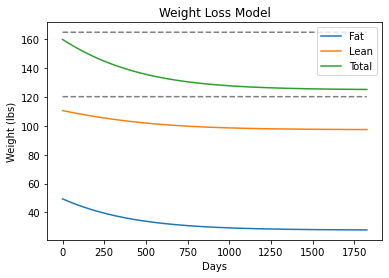

In [10]:
# Provided function.
def fat_mass(BW, age, H, sex):
    BMI = BW / H**2.
    if sex == 'male':
        return BW * (-103.91 + 37.31 * log(BMI) + 0.14 * age) / 100
    else:
        return BW * (-102.01 + 39.96 * log(BMI) + 0.14 * age) / 100

#Demographics
PAL = 1.5
FAT0 = fat_mass(72.57, 38, 1.727, "female")
Weight0 = np.array([FAT0,72.57-FAT0])

t0=0
tf=365*5
EI = 2025
t = np.linspace(0,365*5,365*5)

K = (1/1.4-.14)*2143-3.2*FAT0-22*(Weight0[1])

#Find the solution
sol = solve_ivp(weight_odesystem, (t0,tf), Weight0, t_eval=t)

#Plot the solution
plt.plot(sol.t,sol.y[0]*2.205, label = "Fat")
plt.plot(sol.t,sol.y[1]*2.205, label = "Lean")
plt.plot(sol.t,(sol.y[0]+sol.y[1])*2.205, label = "Total")
plt.plot(sol.t,np.ones_like(sol.t)*((sol.y[0][0]+sol.y[1][0])*2.205+5), '--', color = 'grey')
plt.plot(sol.t,np.ones_like(sol.t)*((sol.y[0][-1]+sol.y[1][-1])*2.205-5), '--', color = 'grey')
plt.legend()
plt.title("Weight Loss Model")
plt.xlabel("Days")
plt.ylabel("Weight (lbs)")
plt.show()

# Problem 7

Modify the preceding problem to handle a two stage weightloss intervention: Suppose for the first 16 weeks intake is reduced from 2143 to 1600 calories/day and physical activity is increased from little to no exercise (PAL=1.4) to an hour of exercise 5 days per week (PAL=1.7). The following 16 weeks intake is increased from 1600 to 2025 calories/day, and exercise is limited to only 2-3 days per week (PAL=1.5).

You will need to recompute F0, and L0 at the end of the first 16 weeks, but K will stay the same. Find and graph the solution curve over the 32 week period.

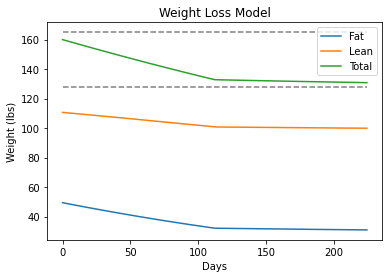

In [17]:
#Demographics
age = 38
sex = "female"
height = 1.727
weight = 72.57
FAT0 = fat_mass(weight, age, height, sex)
Weight0 = np.array([FAT0,72.57-FAT0]) #initial weight
K = (1/1.4-.14)*2143-3.2*Weight0[0]-22*(Weight0[1])


t0  = 0 #Initial Time
tf  = 16*7 #Final Time 1
t01 = tf # Initial Time 2
tf1 = 16*7+16*7 #Final Time 2
t   = np.linspace(0,16*7,16*7*4) #First Domain
t2  = np.linspace(16*7+.25,16*7+16*7,16*7*4) #Second Domain

EI  = 1600 # Decrease in calories
PAL = 1.7  # An hour of exercise 5 days per week
sol = solve_ivp(weight_odesystem, (t0,tf), Weight0, t_eval=t)

Weight1 = np.array([sol.y[0][-1],sol.y[1][-1]]) #Second initial weight

EI = 2025 # Increase in calories
PAL = 1.5 # Decrease in exercise
sol2 = solve_ivp(weight_odesystem, (t01,tf1), Weight1, t_eval=t2)

# Append data lines
days = np.hstack((sol.t,sol2.t))
Fat = np.hstack((sol.y[0]*2.205, sol2.y[0]*2.205))
Lean = np.hstack((sol.y[1]*2.205, sol2.y[1]*2.205))


#Plot the resulting data
plt.plot(days,Fat, label = "Fat")
plt.plot(days,Lean, label = "Lean")
plt.plot(days,Fat+Lean, label = "Total")

plt.plot(days,np.ones_like(days)*((sol.y[0][0]+sol.y[1][0])*2.205+5), '--', color = 'grey')
plt.plot(days,np.ones_like(days)*((sol.y[0][-1]+sol.y[1][-1])*2.205-5), '--', color = 'grey')

plt.legend()
plt.title("Weight Loss Model")
plt.xlabel("Days")
plt.ylabel("Weight (lbs)")
plt.show()